# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [52]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [53]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [54]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [55]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [57]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [58]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [59]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [60]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros_like(dim)
    b = 0

    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero

    return w,b

In [61]:
w, b = initialize_weights(X_train[0])
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [62]:
dim=X_train[0] 
w,b = initialize_weights(dim)

def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [63]:
import math

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    sigm = 1 / (1 + np.exp(-z))
    # compute sigmoid(z) and return

    return sigm

<font color='cyan'>Grader function - 2</font>

In [64]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [65]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum = 0
    for i in range(len(y_true)):
        sum += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss = -1 * (1 / len(y_true)) * sum
    return loss

<font color='cyan'>Grader function - 3 </font>

In [66]:
def grader_logloss(true,pred):
    loss=logloss(true,pred)
    assert(loss==0.07644900402910389)
    return True

true = np.array([1,1,0,1,0])
pred = np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true, pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [67]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y - sigmoid(np.dot(w.T,x) + b)) - ((alpha*w)).sum() / N

    return dw

<font color='cyan'>Grader function - 4 </font>

In [68]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    assert(np.sum(grad_dw)==2.613689585)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [69]:
 def gradient_db(x,y,w,b):
        '''In this function, we will compute gradient w.r.to b '''
        db = y - sigmoid(np.dot(w.T, x) + b)
        
        return db

<font color='cyan'>Grader function - 5 </font>

In [70]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [76]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
        train_pred = []
        test_pred = []
        for j in range(N):
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        for val in range(N):
            train_pred.append(sigmoid(np.dot(w, X_train[val]) + b))
            
        loss1 = logloss(y_train, train_pred)
        train_loss.append(loss1)
            
        for val in range(len(X_test)):
            test_pred.append(sigmoid(np.dot(w, X_test[val]) + b))
            
        loss2 = logloss(y_test, test_pred)
        test_loss.append(loss2)
        
    return w,b,train_loss,test_loss     

In [77]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=14
w,b,train_log_loss,test_log_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [78]:
w, b

(array([-0.89482333,  0.63922611, -0.07409047,  0.63113616, -0.3827988 ,
         0.93469327, -0.89664523, -0.0712441 ,  0.41113383,  0.4155007 ,
         0.24845753,  0.05300599, -0.0870303 ,  0.53952882,  0.06749244]),
 -1.303005862472513)

<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [79]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_
# if you hard check it, it's 0.004 approx

(array([[-4.75149326e-03,  7.60248366e-03,  1.85097969e-03,
          6.50866971e-05,  1.54494847e-03,  2.34083047e-03,
         -9.10016289e-04,  2.16111322e-03,  5.21965791e-03,
         -4.49839833e-03,  1.23610435e-03,  2.54400322e-03,
          1.74956320e-03, -1.28769913e-03,  1.05355585e-03]]),
 array([0.00279952]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

<function matplotlib.pyplot.show(*args, **kw)>

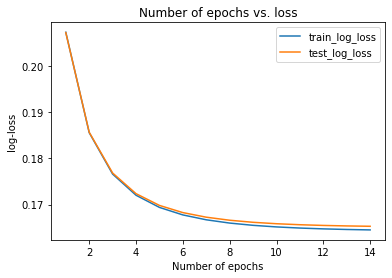

In [93]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,15,1)]

plt.plot(epoch,train_log_loss , label='train_log_loss')
plt.plot(epoch,test_log_loss, label='test_log_loss')
plt.xlabel("Number of epochs")
plt.ylabel("log-loss")
plt.title('Number of epochs vs. loss')
plt.legend()
plt.show

In [94]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9505866666666667
0.9476
